In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy.integrate import odeint
#plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.size': 12})



# HDG - Samples 

In [47]:
def nCr(n,r):    # n choose r function
    Fact = math.factorial
    if n - r<0:
        print('-n')
    return Fact(n) / Fact(r) / Fact(n-r)


def ReplicatorEqn_INF(x,T,N,g,c):  #Replicator Eqn for samples drawn from infinitie population
    return x*(1-x)*(Fitness(x, pD, N, g, c) - Fitness(x, pH, N, g, c))


def RepEqnAlternate_INF(x,T,N,g,c): #Mean replicator equation
    return (x/N)*(c*x**N + g*x**(N-1) - N*c*x + N*c - g - c)
    
    
def Fitness(x, P, N, g, c,T):   #Fitness(fraction doves, payoff, Sample size, Sample size, gain, cost, Threshold)
    if P==pH:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)* x**i *(1-x)**(N-1-i) *P(i,N,g,c)
        return np.sum(probs)
    if P==pH_t:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)* x**i *(1-x)**(N-1-i) *P(i,N,g,c,T)
        return np.sum(probs)
    if P==pD:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)*x**i *(1-x)**(N-1-i)*P(i, N, g, c)
        return np.sum(probs)
    if P==pD_t:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)*x**i *(1-x)**(N-1-i)*P(i, N, g, c,T)
        return np.sum(probs)
    else:
        print('unknown payoff')


def pH(hNumber,N,g,c):   #payoff hawk
    if hNumber==0:
        return 0
    elif hNumber>0:
        return (g-(hNumber-1)*c )/(hNumber)
    else:
        print("Error, hNumber is negative")
        
        
def pD(hNumber,N,g,c):  #payoff Doves
    if hNumber>0:
        return 0
    elif hNumber==0:
        return g/N
    else:
        print("hNumber is negative")
        return -1
    
    



In [48]:
cost_h = np.linspace(0.01,1,200) #costs
N = np.array([5,8,10,20],dtype=int) #Samples
Doves = np.array([0.55,0.6,0.7,0.8]) #Different initial conditions

abserr = 1.0e-3    #errors for integrator
relerr = 1.0e-8

t = np.linspace(0,200,100)  # time/ generations

x_star = np.zeros((len(Doves),len(N),len(cost_h)))    #Equilibrium points
doves = np.zeros((len(Doves),len(N), len(cost_h),len(t)))
hawks = np.zeros((len(Doves),len(N), len(cost_h),len(t)))
xdot = np.zeros((len(Doves),len(N), len(cost_h),len(t)))  #derivative of fraction of doves


In [49]:
for z in range(len(Doves)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            wsol = odeint(RepEqnAlternate_INF, Doves[z],t, args=(N[i],1,cost_h[k]),atol=abserr, rtol=relerr) #Integrate mean rep eqn
            doves[z,i,k,:] = wsol[:,0]
            hawks[z,i,k,:] = 1-doves[z,i,k,:]

In [50]:
for z in range(len(Doves)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            for j in range(len(doves)):
                xdot[z,i,k,j] = RepEqnAlternate_INF(doves[z,i,k,j],t,N[i],1,cost_h[k])

In [51]:
#plt.figure(1,figsize=[10,9])                                         #Plot x Vs time
#plt.subplot(221)
#plt.plot(t,hawks[2,2,100,:],color='r', label='H')
#plt.plot(t,doves[2,2,100,:],color='b', label='D')
#plt.xlabel("time")
#plt.ylabel("#")


#plt.subplot(222)                                                       #Plot Xdot Vs time
#plt.plot(t,xdot[2,2,100,:],color='r', label='H')
#plt.xlabel("time")
#plt.ylabel("#")


#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.65)
#plt.show()

In [52]:
#Pick out equilibrium points and simulations which end in coexistence
Index=[]    #Indices for which coexistence occurs

for z in range(len(Doves)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            J = np.where(xdot[z,i,k,:]==0)[0]   # Array with xdot=0 (possible) Equilibrium points 
            x_star[z,i,k]=doves[z,i,k,J[0]]    #Fraction of doves when xdot=0
            if hawks[z,i,k,J[-1]] > 0.05 and doves[z,i,k,J[-1]]>0.05:   #Coexistence condition
                Index.append((z,i,k))
                
i1 = np.zeros(len(Index))
i2 = np.zeros(len(Index))
i3 = np.zeros(len(Index))

for i in range(len(Index)):
    i1[i],i2[i],i3[i] = Index[i]

                
                


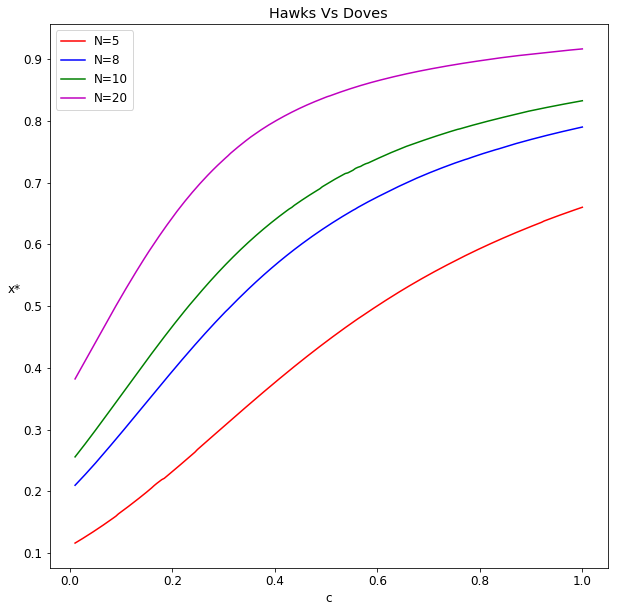

In [70]:
plt.figure(5,figsize=[10,10])                               #Plot x_star Vs cost for diff sample sizes
plt.plot(cost_h,x_star[0,0,:],color='r', label="N=5")
plt.plot(cost_h,x_star[0,1,:],color='b', label="N=8")
plt.plot(cost_h,x_star[0,2,:],color='g', label="N=10")
plt.plot(cost_h,x_star[0,3,:],color='m', label="N=20")
#for i in range(len(Index)):                                   #Mark for simulations which end in coexistence
#    if i1[i]==0:
#        plt.scatter(cost_h[int(i3[i])],x_star[int(i1[i]),int(i2[i]),int(i3[i])], marker='o',color='y')



plt.title("Hawks Vs Doves")
plt.xlabel("c")
plt.ylabel("x*", rotation=0 , labelpad=10)
plt.legend()
plt.show()



## Imperials Vs Rebels

In [54]:
def nCr(n,r):    # n choose r
    Fact = math.factorial
    if n - r<0:
        print('-n')
    return Fact(n) / Fact(r) / Fact(n-r)


def RepEqn_SW(x,TIME,N,g,c):        #Replicator Eqn for IRG
    return x*(1-x)*(Fitness_SW(x, pR, N, g, c,0) - Fitness_SW(x, pI, N, g, c,0))

def RepEqn_SW_T(x,TIME,N,g,c,T):     #Replicator Eqn for IRG-T
    return x*(1-x)*(Fitness_SW(x,pR_t,N,g,c,T) - Fitness_SW(x,pI_t,N,g,c,T))


    
    
def Fitness_SW(x, P, N, g, c,T):   #Fitness(fraction doves, Payoff, Sample size, Gain, Cost, Threshold)
    if P==pI:  
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)* x**i *(1-x)**(N-1-i) *P(i,N,g,c)
        return np.sum(probs)
    if P==pI_t:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)* x**i *(1-x)**(N-1-i) *P(i,N,g,c,T)
        return np.sum(probs)
    if P==pR:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)*x**i *(1-x)**(N-1-i)*P(i, N, g, c)
        return np.sum(probs)
    if P==pR_t:
        probs = np.zeros(N)
        for i in range(N):
            probs[i] = nCr(N-1,i)*x**i *(1-x)**(N-1-i)*P(i, N, g, c,T)
        return np.sum(probs)
    else:
        print('unknown payoff')


def pI(hNumber,N,g,c):   #payoff Imperials
    if hNumber==0:
        return 0
    elif hNumber>0:
        return (g-(hNumber-1)*c - c/4)/(hNumber)
    else:
        print("Error, hNumber is negative")
        
        
def pR(hNumber,N,g,c):  #payoff Rebels
    if hNumber>0:
        return -c/(N-hNumber)   
    elif hNumber==0:
        return g/N
    else:
        print("hNumber is negative")
        return -1
    
    

def pI_t(hNumber,N,g,c,T):   #payoff Imperials in IRG-T
    dNumber = N - hNumber
    if hNumber==0:
        return 0
    if dNumber/N >= T and hNumber!=0:
        return -c/(4*hNumber)
    if dNumber/N<T:
        return (g-(hNumber-1)*c - c/4)/(hNumber)                        
    else:
        print("Error, hNumber is negative")
        return -1

def pR_t(hNumber,N,g,c,T):  #payoff Rebeles in IRG-T
    dNumber = N - hNumber
    if dNumber==0:
        return 0
    if dNumber/N >= T:
        return (g-c)/dNumber
    if dNumber/N < T and dNumber != 0:
        return -c/(dNumber)
    if hNumber==0:
        return g/N
    else:
        print("hNumber is negative")
        return -1

In [55]:
cost_h = np.linspace(0.01,1,200)  #Costs
N = np.array([5,8,10,20],dtype=int)  #Sample sizes
X_o = np.array([0.55,0.6,0.7,0.8])  #Initial fraction

abserr = 1.0e-3
relerr = 1.0e-8

t = np.linspace(0,200,100)  # time/ generations

x_star_SW = np.zeros((len(X_o),len(N),len(cost_h)))
Rebels = np.zeros((len(X_o),len(N), len(cost_h),len(t)))
Imperials = np.zeros((len(X_o),len(N), len(cost_h),len(t)))
xdot_SW = np.zeros((len(X_o),len(N), len(cost_h),len(t)))


In [56]:
for z in range(len(X_o)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            wsol = odeint(RepEqn_SW, X_o[z],t, args=(N[i],1,cost_h[k]),atol=abserr, rtol=relerr) #Integrate Rep eqn
            Rebels[z,i,k,:] = wsol[:,0]
            Imperials[z,i,k,:] = 1-Rebels[z,i,k,:]

In [57]:
for z in range(len(X_o)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            for j in range(len(Rebels)):
                xdot_SW[z,i,k,j] = RepEqn_SW(Rebels[z,i,k,j],t,N[i],1,cost_h[k]) #Derivative of fraction of Rebels

In [58]:
Index=[]  


for z in range(len(X_o)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            J = np.where(xdot_SW[z,i,k,:]==0)[0]
            x_star_SW[z,i,k]=Rebels[z,i,k,J[0]]
            if Imperials[z,i,k,J[-1]] > 0.05 and Rebels[z,i,k,J[-1]]>0.05:
                Index.append((z,i,k))
                
                
                


In [59]:
#plt.figure(1,figsize=[10,9])               #Plot Populations Vs time
#plt.subplot(221)
#plt.plot(t,Imperials[2,1,100,:],color='r', label='I')
#plt.plot(t,Rebels[2,1,100,:],color='b', label='R')
#plt.xlabel("time")
#plt.ylabel("#")
#plt.legend()


#plt.subplot(222)                                 #Plot xdot Vs time
#plt.plot(t,xdot_SW[2,1,100,:],color='r')
#plt.xlabel("time")
#plt.ylabel("xdot")

#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.65)
#plt.show()

In [60]:
i1 = np.zeros(len(Index))
i2 = np.zeros(len(Index))
i3 = np.zeros(len(Index))

for i in range(len(Index)):
    i1[i],i2[i],i3[i] = Index[i]


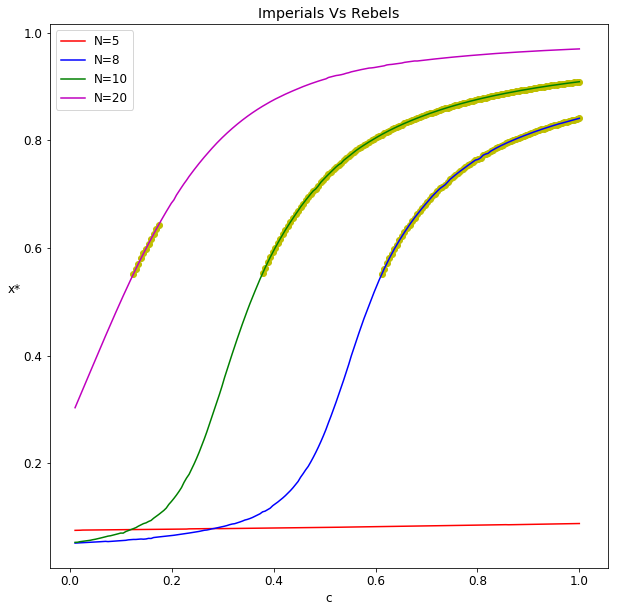

In [61]:
plt.figure(5,figsize=[10,10])

plt.plot(cost_h,x_star_SW[0,0,:],color='r', label="N=5")
plt.plot(cost_h,x_star_SW[0,1,:],color='b', label="N=8")
plt.plot(cost_h,x_star_SW[0,2,:],color='g', label="N=10")
plt.plot(cost_h,x_star_SW[0,3,:],color='m', label="N=20")
for i in range(len(Index)):
    if i1[i]==0:
        plt.scatter(cost_h[int(i3[i])],x_star_SW[int(i1[i]),int(i2[i]),int(i3[i])], marker='o',color='y')

plt.title("Imperials Vs Rebels")     
plt.xlabel("c")
plt.ylabel("x*", rotation=0 , labelpad=10)
plt.legend()
plt.show()

## IvRG-T

In [62]:
cost_h = np.linspace(0.01,1,200)
N = np.array([5,8,10,20],dtype=int)
X_o = np.array([0.55,0.7])
T=np.array([0.5,0.6,0.7,0.8],dtype=float)

abserr = 1.0e-3
relerr = 1.0e-8

t = np.linspace(0,200,100)  # time/ generations

x_star_T = np.zeros((len(X_o),len(N),len(cost_h),len(T)))
Rebels_T = np.zeros((len(X_o),len(N), len(cost_h),len(t),len(T)))
Imperials_T = np.zeros((len(X_o),len(N), len(cost_h),len(t),len(T)))
xdot_T = np.zeros((len(X_o),len(N), len(cost_h),len(t),len(T)))


In [63]:
for z in range(len(X_o)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            for j in range(len(T)):
                wsol = odeint(RepEqn_SW_T, X_o[z],t, args=(N[i],1,cost_h[k],T[j]),atol=abserr, rtol=relerr)
                Rebels_T[z,i,k,:,j] = wsol[:,0]
                Imperials_T[z,i,k,:,j] = 1-Rebels_T[z,i,k,:,j]

In [64]:
for z in range(len(X_o)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            for j in range(len(Rebels)):
                for h in range(len(T)):
                    xdot_T[z,i,k,j,h] = RepEqn_SW_T(Rebels_T[z,i,k,j,h],t,N[i],1,cost_h[k],T[h])

In [65]:
Index=[]


for z in range(len(X_o)):
    for i in range(len(N)):
        for k in range(len(cost_h)):
            for j in range(len(T)):
                J = np.where(xdot_T[z,i,k,:,j]==0)[0]
                x_star_T[z,i,k,j]=Rebels_T[z,i,k,J[-1],j]    #Index [-1] guarantees equilibrium point (for cases where xdot changes sign)
                if Imperials_T[z,i,k,J[-1],j] > 0.05 and Rebels_T[z,i,k,J[-1],j]>0.05:
                    Index.append((z,i,k,j))
                
                
                


In [66]:
i1 = np.zeros(len(Index))
i2 = np.zeros(len(Index))
i3 = np.zeros(len(Index))
i4 = np.zeros(len(Index))

for i in range(len(Index)):
    i1[i],i2[i],i3[i], i4[i] = Index[i]


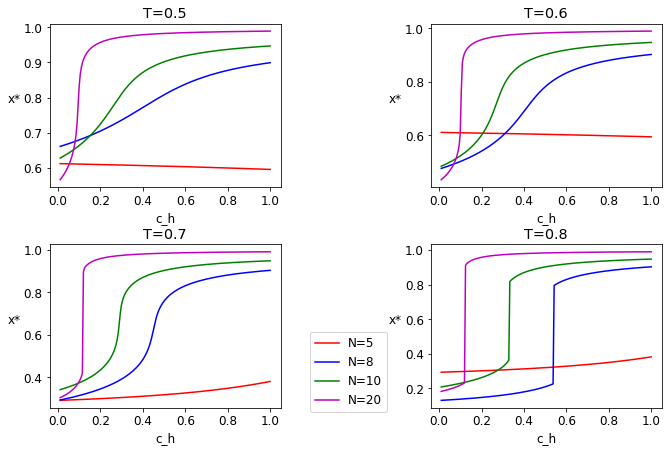

In [69]:
plt.figure(5,figsize=[10,10])          ### Plots for different Thresholds:  x* Vs costs for different Sample sizes  

plt.subplot(321)
plt.plot(cost_h,x_star_T[0,0,:,0],color='r', label="N=5")
plt.plot(cost_h,x_star_T[0,1,:,0],color='b', label="N=8")
plt.plot(cost_h,x_star_T[0,2,:,0],color='g', label="N=10")
plt.plot(cost_h,x_star_T[0,3,:,0],color='m', label="N=20")
#for i in range(len(Index)):               #Signals simulations which end in coexistence
#    if i4[i]==0 and i1[i]==0:
#        plt.scatter(cost_h[int(i3[i])],x_star_T[int(i1[i]),int(i2[i]),int(i3[i]),int(i4[i])], marker='o',color='y')

plt.title("T={}".format(T[0]))
plt.xlabel("c_h")
plt.ylabel("x*", rotation=0 , labelpad=10)
#plt.legend()



plt.subplot(322)
plt.plot(cost_h,x_star_T[0,0,:,1],color='r', label="N=5")
plt.plot(cost_h,x_star_T[0,1,:,1],color='b', label="N=8")
plt.plot(cost_h,x_star_T[0,2,:,1],color='g', label="N=10")
plt.plot(cost_h,x_star_T[0,3,:,1],color='m', label="N=20")
#for i in range(len(Index)):
#    if i4[i]==1 and i1[i]==0:
#        plt.scatter(cost_h[int(i3[i])],x_star_T[int(i1[i]),int(i2[i]),int(i3[i]),int(i4[i])], marker='o',color='y')

        
plt.xlabel("c_h")
plt.ylabel("x*", rotation=0 , labelpad=10)
plt.title("T={}".format(T[1]))
#plt.legend()


plt.subplot(323)
plt.plot(cost_h,x_star_T[0,0,:,2],color='r', label="N=5")
plt.plot(cost_h,x_star_T[0,1,:,2],color='b', label="N=8")
plt.plot(cost_h,x_star_T[0,2,:,2],color='g', label="N=10")
plt.plot(cost_h,x_star_T[0,3,:,2],color='m', label="N=20")
#for i in range(len(Index)):
#   if i4[i]==2 and i1[i]==0:
#        plt.scatter(cost_h[int(i3[i])],x_star_T[int(i1[i]),int(i2[i]),int(i3[i]),int(i4[i])], marker='o',color='y')

        
plt.xlabel("c_h")
plt.title("T={}".format(T[2]))
plt.ylabel("x*", rotation=0 , labelpad=10)
#plt.legend()



plt.subplot(324)
plt.plot(cost_h,x_star_T[0,0,:,3],color='r', label="N=5")
plt.plot(cost_h,x_star_T[0,1,:,3],color='b', label="N=8")
plt.plot(cost_h,x_star_T[0,2,:,3],color='g', label="N=10")
plt.plot(cost_h,x_star_T[0,3,:,3],color='m', label="N=20")
#for i in range(len(Index)):
#    if i4[i]==3 and i1[i]==0:
#        plt.scatter(cost_h[int(i3[i])],x_star_T[int(i1[i]),int(i2[i]),int(i3[i]),int(i4[i])], marker='o',color='y')

        
plt.xlabel("c_h")
plt.title("T={}".format(T[3]))
plt.ylabel("x*", rotation=0 , labelpad=10)



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.65)
plt.legend(loc='upper left', bbox_to_anchor=(-0.55, 0.5))
plt.show()

